# Preparing Data in JSON 

(1) Importing Necessary Library

In [1]:
# Important Library
import os
import json
from pprint import pprint

# Audio Data Analysis Library
import librosa
import numpy as np
import pandas as pd

# Data Visualization Library
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

(2) Analyzing Data

In [2]:
# Analyzing audio data before preparing dataset to get more information of our audio data.

class Meta_Data():
    """
    The information from class "Meta_Data" will be used later to prepare our dataset.
    """
    
    def __init__(self, audio_Data_Path):
        """
        :param audio_Data_Path : path of audio data.
        """
        
        self.path = audio_Data_Path
    
    # Method to play audio
    def play_Audio(self):
        """
        Playing Audio to make sure we are using the correct input to extract MFCCs.
        
        :param audio : audio file in .wav format.
        """
        
        audio = ipd.Audio(self.path)
        
        return audio
    
    # Method to Extract MFCCs
    def extracting_MFCCs(self):
        """
        MFCCs (Mel Frequency Cepstrum Coefficent) is representation of the short-term power spectrum of an audio or sound.
        
        :param signal : 
        :param sample_Rate : Number of sample in one second.
        :param n_mfcc : Number of coefficent (y-intercept).
        :paramm mfccs: Feature of audio data in 2D array.
        """
        
        # Loading audio files
        signal, sample_Rate = librosa.load(self.path)
        
        # Extracting MFCCs Feature
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sample_Rate)
        print("Shape of an audio: ", mfccs.shape)
        
        return signal, sample_Rate, mfccs
    
    # Method to Visualise MFCCs
    def visualising_MFCCs(self):
        signal, sample_Rate, mfccs = self.extracting_MFCCs()
        plt.figure(figsize=(25, 10))
        librosa.display.specshow(mfccs, x_axis="time", sr=sample_Rate)
        plt.title("Mel Frequency Cepstrum Coefficent (MFCCs)")
        plt.colorbar(format="%+2.f")
        plt.show()

In [3]:
# Creating numa object of class Meta_Data
numa_object = Meta_Data("2_English_KM/1_English_Audio_Data/numa/20.wav")

# Calling play_Audio() method from class Meta_Data
numa_object.play_Audio()

In [4]:
# Calling extracting_MFCCs method from class Meta_Data
numa_object.extracting_MFCCs()

Shape of an audio:  (13, 30)


(array([-0.00054243, -0.00101544, -0.00072907, ...,  0.0008417 ,
         0.00068704,  0.00059224], dtype=float32),
 22050,
 array([[-5.91500000e+02, -5.53807373e+02, -5.30187317e+02,
         -5.19603394e+02, -5.06066833e+02, -4.96562714e+02,
         -4.99578613e+02, -5.06984344e+02, -5.23228333e+02,
         -5.25765625e+02, -5.25878723e+02, -5.29923462e+02,
         -5.26652283e+02, -4.97655426e+02, -4.78206665e+02,
         -4.76560059e+02, -4.76063049e+02, -4.75224274e+02,
         -4.85356812e+02, -4.98418091e+02, -5.10255035e+02,
         -5.24011841e+02, -5.34246765e+02, -5.43903442e+02,
         -5.58244629e+02, -5.75284058e+02, -5.91852966e+02,
         -6.07608704e+02, -6.10220093e+02, -6.13743286e+02],
        [ 9.37250900e+01,  1.15086044e+02,  1.23583153e+02,
          1.28443817e+02,  1.31727173e+02,  1.34862885e+02,
          1.38367493e+02,  1.40008652e+02,  1.33812775e+02,
          1.36202576e+02,  1.41034729e+02,  1.38682098e+02,
          1.39707306e+02,  1.607704

Shape of an audio:  (13, 30)


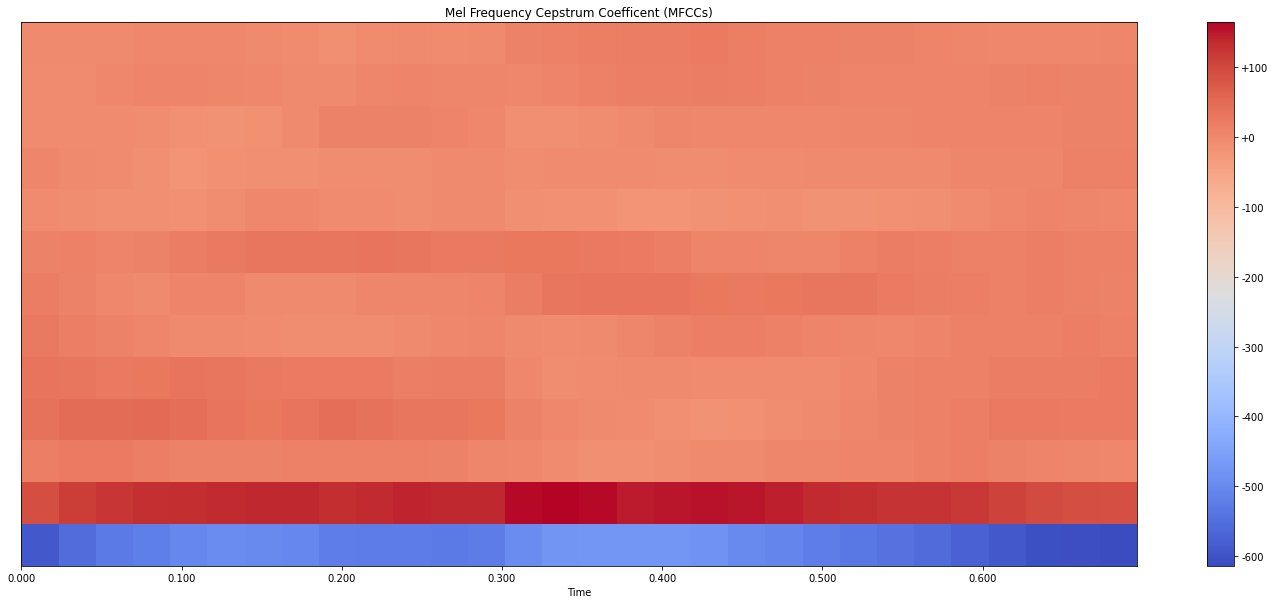

In [5]:
numa_object.visualising_MFCCs()

In [6]:
# Creating chrome object of class Meta_Data
chrome_object = Meta_Data("2_English_KM/1_English_Audio_Data/chrome/20.wav")
chrome_object.play_Audio()

In [7]:
chrome_object.extracting_MFCCs()

Shape of an audio:  (13, 16)


(array([1.2733590e-05, 3.4578686e-06, 5.8316864e-06, ..., 1.0162737e-04,
        7.6840653e-05, 4.0864867e-05], dtype=float32),
 22050,
 array([[-6.61076843e+02, -6.01556274e+02, -5.43931091e+02,
         -5.01655914e+02, -4.67765808e+02, -4.50397675e+02,
         -4.49199463e+02, -4.51800476e+02, -4.61199677e+02,
         -4.82516205e+02, -5.10828613e+02, -5.44660217e+02,
         -5.82747192e+02, -6.20521301e+02, -6.53645813e+02,
         -6.70574829e+02],
        [ 5.68504906e+01,  1.14494659e+02,  1.56678070e+02,
          1.73862274e+02,  1.57327042e+02,  1.42791809e+02,
          1.41404266e+02,  1.60944839e+02,  1.75369751e+02,
          1.77380386e+02,  1.70556152e+02,  1.56283936e+02,
          1.31303665e+02,  1.00242798e+02,  6.83908539e+01,
          5.14092407e+01],
        [ 4.92655792e+01,  7.34604263e+01,  6.97852325e+01,
          4.06659851e+01,  2.26027641e+01,  2.20126133e+01,
          3.02856922e+01,  4.91496735e+01,  7.10452423e+01,
          8.44010925e+01,  8.7

Shape of an audio:  (13, 16)


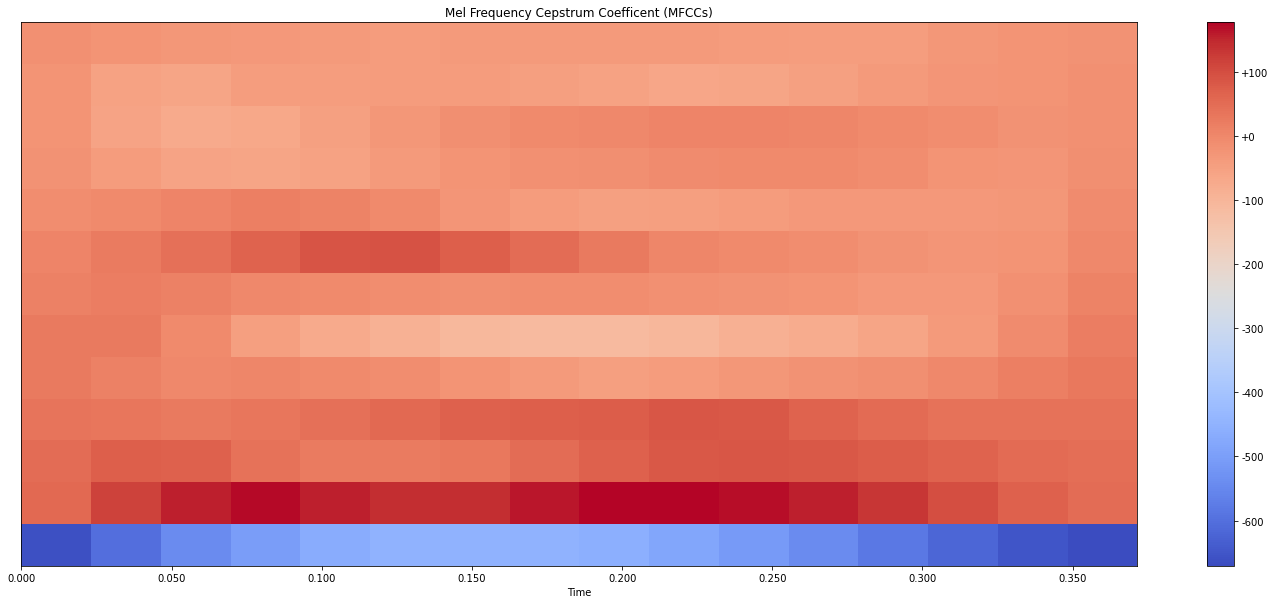

In [8]:
chrome_object.visualising_MFCCs()

(3) Prepraing Dataset In JSON Format

In [9]:
"""
:param sample_Consideration : Sound duration in second.
    where,
        22050 is "sample rate" which mean number of sound per each second.
"""

sample_Consideration = 22050 

class Prepare_Dataset():
    """
    Preparing Dataset by extracting audio feature "MFCCs" and saves them in JSON file.
    """
    
    def __init__(self, dataset_Path, json_Path):
        self.dataset_Path = dataset_Path
        self.json_Path = json_Path
    
    def preprocess_Data(self, n_mfcc=13, hop_length=512, n_fft=2048):
        """
        Preprocessing Data include loding, extracting mfccs.
        
        :param n_mfcc : Number of coeffecient (y-intercept).
        :param hop_length : Length of each segment of MFCCs.
        :param n_fft : Length of window.
        :param data : Data Dictonary to store feature in key and field.
        :param mapping (List) : Store the keyword value.
        :param labels (List) : Store numberical value which map with mapping List values.
        :param MFCCs (Array) : 2D Array.
        :param files (String) : Name of the files.
        """
        
        # Creating dictonary to store the features and other meta data.
        data = {
            "mappings": [],
            "labels": [],
            "MFCCs": [],
            "files": []
        }
        
        
        # Lopping through all the sub directories of our dataset_path
        for i, (dirpath, dirnames, filenames) in enumerate(os.walk(self.dataset_Path)):
            try:
                # Stop when we are at root level
                if dirpath is not self.dataset_Path:

                    # Update Mapping 
                    category = dirpath.split("/")[-1] # root/dirpath -> [root, dirpath] and [-1] ensure we append index 2 value
                    data["mappings"].append(category)
                    print(f"processing {category}")

                    # Looping through all the filesnames  and extract MFCCs
                    for file in filenames:

                        # get the file path
                        file_Path = os.path.join(dirpath, file)

                        # load audio file
                        signal, sample_Rate = librosa.load(file_Path)

                        # Ensure the audio file is at least 1 second
#                         if len(signal) >= sample_Consideration:

                            # Enforce audio file to 1 second 
#                             signal = signal[:sample_Consideration]

                        # Extract the MFCCs
                        MFCCs = librosa.feature.mfcc(signal, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)

                        # Storing Data
                        data["labels"].append(i-1)
                        data["MFCCs"].append(MFCCs.T.tolist()) # where T = Transpose and tolist() is because MFCCs give ndarray which can't store on json so casting to list
                        data["files"].append(file_Path)
                        print(f"{file_Path} : {i-1}")
                            
            except Exception as error:
                continue

        # Store in json file
        with open(self.json_Path, "w") as fp:
            json.dump(data, fp, indent=4)     

In [10]:
# # Creating the object for Nepali Dataset
# """
#     :param dataset_Path_Nepali : Path of the Nepali audio data.
#     :param json_Path_Nepali : Path to store JSON file after preparing Nepali audio data.
# """

# dataset_Path_Nepali = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/1_Nepali_KM/1_Nepali_Audio_Data"
# json_Path_Nepali = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_Nepali_Json_Output_File/Nepali_Data.json"

# nepali_Object = Prepare_Dataset(dataset_Path_Nepali, json_Path_Nepali)
# print("************** Finished Preparing Nepali Dataset ************************")  

In [11]:
# # Creating the object for English Dataset
# """
#     :param dataset_Path_English : Path of the English audio data.
#     :param json_Path_English : Path to store JSON file after preparing English audio data.
# """

# dataset_Path_English = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/1_English_Audio_Data"
# json_Path_English = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/2_English_Json_Output_File/English_Data.json"


# english_Object = Prepare_Dataset(dataset_Path_English, json_Path_English)
# english_Object.preprocess_Data()
# print("************** Finished Preparing English Dataset ************************")

In [66]:
# Creating the object for English Dataset
"""
    :param dataset_Path_English : Path of the English audio data.
    :param json_Path_English : Path to store JSON file after preparing English audio data.
"""

dataset_Path_English = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder"
json_Path_English = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/2_English_Json_Output_File/English_Data2.json"


english_Object = Prepare_Dataset(dataset_Path_English, json_Path_English)
english_Object.preprocess_Data()
print("************** Finished Preparing English Dataset ************************")

processing open
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/open/3.wav : 0
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/open/2.wav : 0
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/open/4.wav : 0
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/open/5.wav : 0
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/open/1.wav : 0
processing close
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/New Audio Folder/close/3.wav : 1
/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa

In [12]:
# https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length
"""
Creating dataframe of json file.

:param orginal_df (DataFrame) : Dataframe of json data. 
:param df : Copy file of orginal_df.
"""

json_Path_English = "/home/atomyongya/Documents/Herald/Final Year Project/VoiceAssistant(Numa)/VoiceAssistant/1 System Model/2_English_KM/2_English_Json_Output_File/English_Data.json"

orginal_df = pd.read_json(json_Path_English, orient='index')
df = orginal_df

"""
Applying transpose() function which changes the row elements into column 
elements and the column elements into row elements.
"""

df = df.transpose()
df.head(10)

,mappings,labels,MFCCs,files
0,shut down,0,"[[-684.7459106445312, 28.17382049560547, 67.06...",/home/atomyongya/Documents/Herald/Final Year P...
1,file,0,"[[-680.453125, 83.63780975341797, 4.1303038597...",/home/atomyongya/Documents/Herald/Final Year P...
2,open,0,"[[-646.0154418945312, -62.44590377807617, 55.1...",/home/atomyongya/Documents/Herald/Final Year P...
3,chrome,0,"[[-761.268798828125, 28.99753761291504, 27.164...",/home/atomyongya/Documents/Herald/Final Year P...
4,close,0,"[[-654.1539306640625, 27.386369705200195, 80.0...",/home/atomyongya/Documents/Herald/Final Year P...
5,folder,0,"[[-661.2791748046875, -57.01517868041992, 39.3...",/home/atomyongya/Documents/Herald/Final Year P...
6,google,0,"[[-619.58740234375, 2.266775608062744, 65.0695...",/home/atomyongya/Documents/Herald/Final Year P...
7,numa,0,"[[-683.4407958984375, 8.626459121704102, 37.25...",/home/atomyongya/Documents/Herald/Final Year P...
8,play,0,"[[-726.9418334960938, 13.565881729125977, 33.0...",/home/atomyongya/Documents/Herald/Final Year P...
9,youtube,0,"[[-672.9800415039062, -52.42742919921875, 58.1...",/home/atomyongya/Documents/Herald/Final Year P...


In [15]:
files = [file for file in df["files"]]
print(len(files))

871


In [32]:
labels = df["labels"]
mappings = df["mappings"]
mapping_Unique = mappings.unique()
mapping_Unique

array(['shut down', 'file', 'open', 'chrome', 'close', 'folder', 'google',
       'numa', 'play', 'youtube', None], dtype=object)

In [65]:
mfccs = df["MFCCs"]

for i in range(len(df)):
    try:
        mfccs_one = mfccs[i]
        mfccs_again = mfccs_one[i]
        print(len(mfccs_one), len(mfccs_again))
    except Exception as error:
        print("Null")
        continue
print(i)

31 13
29 13
21 13
33 13
31 13
27 13
24 13
26 13
37 13
34 13
27 13
31 13
37 13
39 13
33 13
26 13
28 13
33 13
26 13
38 13
29 13
31 13
31 13
32 13
34 13
28 13
44 13
Null
32 13
31 13
35 13
Null
35 13
36 13
Null
37 13
44 13
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
N

In [52]:
for items in mfccs_List:
    

[-684.7459106445312,
 28.17382049560547,
 67.06031799316406,
 30.442401885986328,
 -19.179332733154297,
 19.17431640625,
 -22.786602020263672,
 -23.14084243774414,
 -14.903948783874512,
 -24.043127059936523,
 -15.824614524841309,
 -1.2722580432891841,
 -16.171300888061523]
[-680.453125,
 83.63780975341797,
 4.130303859710693,
 58.12797927856445,
 9.975700378417969,
 -18.48251724243164,
 2.404268264770508,
 -57.75310516357422,
 -12.732949256896973,
 19.806304931640625,
 -27.404306411743164,
 1.355255484580993,
 14.709367752075195]
[-646.0154418945312,
 -62.44590377807617,
 55.119163513183594,
 41.07322311401367,
 -29.761199951171875,
 32.084800720214844,
 20.931697845458984,
 -3.77009916305542,
 -6.941744804382324,
 30.51729393005371,
 -20.253437042236328,
 -11.72507095336914,
 11.519142150878906]
[-761.268798828125,
 28.99753761291504,
 27.164209365844727,
 17.879642486572266,
 -5.48123836517334,
 6.29743766784668,
 45.05783462524414,
 -12.925175666809082,
 -2.760762691497802,
 29.6797

 -15.833009719848633,
 9.244099617004395,
 18.52084732055664,
 6.463466167449951,
 -19.070037841796875,
 -27.302459716796875,
 -21.246604919433594,
 -5.817226886749268,
 -0.023427009582519]
[-648.8833618164062,
 41.10752487182617,
 22.477188110351562,
 -7.172941207885742,
 -8.781393051147461,
 3.147881507873535,
 10.239339828491211,
 14.3922119140625,
 0.5479581356048581,
 -8.35720443725586,
 -11.684784889221191,
 -17.124610900878906,
 -12.550508499145508]
[-600.2283325195312,
 142.6307373046875,
 55.82108688354492,
 2.7646632194519043,
 6.4034833908081055,
 28.193145751953125,
 28.988008499145508,
 4.494575500488281,
 -30.860193252563477,
 -60.680179595947266,
 -65.90584564208984,
 -37.94611358642578,
 0.53271734714508]
[-655.239501953125,
 97.37701416015625,
 37.78630828857422,
 -33.981727600097656,
 -31.691213607788086,
 -19.643783569335938,
 9.915960311889648,
 12.729022979736328,
 8.766249656677246,
 -2.014132976531982,
 -19.87912368774414,
 -24.488548278808594,
 -31.2091102600097

 52.76545715332031,
 38.664947509765625,
 24.883756637573242,
 15.94566535949707,
 9.376129150390625,
 0.33774837851524303,
 -11.62104606628418,
 -21.549087524414062,
 -24.85637664794922,
 -23.008403778076172,
 -22.31659507751465,
 -26.89911651611328]
[-687.5513916015625,
 76.51969909667969,
 -32.895355224609375,
 -8.278922080993652,
 70.67819213867188,
 61.020118713378906,
 0.9310470819473261,
 -10.577983856201172,
 2.941351413726806,
 -16.396799087524414,
 -40.814212799072266,
 -32.181053161621094,
 -15.436904907226562]
[-693.4942016601562,
 100.19998168945312,
 55.822601318359375,
 -2.939292907714843,
 -20.350627899169922,
 -12.40906047821045,
 5.939895153045654,
 18.47648811340332,
 2.031554698944092,
 -11.080009460449219,
 -29.962783813476562,
 -27.575313568115234,
 -25.905349731445312]
[-674.3519897460938,
 17.28243637084961,
 43.71167755126953,
 22.433757781982422,
 16.146133422851562,
 46.92932891845703,
 4.160114765167236,
 8.630292892456055,
 -20.166240692138672,
 -27.6658535